In [55]:
# importamos las librerías que vamos a usar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

# Configuramos el formato de los números flotantes para evitar la notación científica
pd.options.display.float_format = '{:,.2f}'.format

In [56]:
# Dataset: https://www.kaggle.com/datasets/danielgrijalvas/movies

# Convertimos el archivo csv en un dataframe

df_movies = pd.read_csv('movies.csv')

## Entendiendo el dataset

In [57]:
# Exploramos las primeras filas

df_movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,"927,000.00",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000.00","46,998,772.00",Warner Bros.,146.00
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,"65,000.00",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000.00","58,853,106.00",Columbia Pictures,104.00
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,"1,200,000.00",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000.00","538,375,067.00",Lucasfilm,124.00
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,"221,000.00",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000.00","83,453,539.00",Paramount Pictures,88.00
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,"108,000.00",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000.00","39,846,344.00",Orion Pictures,98.00


In [58]:
# Vemos la cantidad de filas y columnas

df_movies.shape

(7668, 15)

In [59]:
# Veamos el tipo de dato de cada columna
df_movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [60]:
# Y las estadísticas de las columnas numéricas

df_movies.describe()

,year,score,votes,budget,gross,runtime
count,"7,668.00","7,665.00","7,665.00","5,497.00","7,479.00","7,664.00"
mean,"2,000.41",6.39,"88,108.50","35,589,876.19","78,500,541.02",107.26
std,11.15,0.97,"163,323.76","41,457,296.60","165,725,124.32",18.58
min,"1,980.00",1.90,7.00,"3,000.00",309.00,55.00
25%,"1,991.00",5.80,"9,100.00","10,000,000.00","4,532,055.50",95.00
50%,"2,000.00",6.50,"33,000.00","20,500,000.00","20,205,757.00",104.00
75%,"2,010.00",7.10,"93,000.00","45,000,000.00","76,016,691.50",116.00
max,"2,020.00",9.30,"2,400,000.00","356,000,000.00","2,847,246,203.00",366.00


# Transformación

##### Las columnas "votes" y "runtime" son de tipo float pero deberían ser números enteros. Cambiemos el tipo de dato.

In [61]:
df_movies["votes"] = df_movies["votes"].astype("Int64")

df_movies["runtime"] = df_movies["runtime"].astype("Int64")

df_movies.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000.00","46,998,772.00",Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000.00","58,853,106.00",Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000.00","538,375,067.00",Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000.00","83,453,539.00",Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000.00","39,846,344.00",Orion Pictures,98


##### Actualicemos también el nombre de la columna "runtime" para clarificar que se trata de minutos.

In [62]:
df_movies = df_movies.rename(columns={"runtime": "runtime(m)"})

df_movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime(m)
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000.00","46,998,772.00",Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000.00","58,853,106.00",Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000.00","538,375,067.00",Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000.00","83,453,539.00",Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000.00","39,846,344.00",Orion Pictures,98


##### Según lo indicado en el dataset original, la columna "year" hace referencia al año de lanzamiento de la película. Por ende, el campo "released" no pareciera estar aportando información valiosa. A continuación, veremos si los años de estas columnas coinciden para determinar cómo seguir.

In [63]:
# En primer lugar, extraemos el año de la columna "released" en una nueva columna llamada "released_year"

df_movies["released_year"] = df_movies['released'].str.extract(r'(\d{4})')

df_movies["released_year"]

0       1980
1       1980
2       1980
3       1980
4       1980
        ... 
7663    2020
7664    2020
7665    2020
7666    2020
7667    2020
Name: released_year, Length: 7668, dtype: object

In [10]:
# Convertimos el tipo de dato a entero para poder compararlo con la columna "year"

df_movies["released_year"] = df_movies["released_year"].astype("Int64")

In [11]:
# Finalmente, buscamos si existen registros donde "year" y "released_year" no coincidan

df_movies[df_movies["released_year"] != df_movies["year"]]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime(m),released_year
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.80,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,"54,000,000.00","108,185,706.00",Dovemead Films,127,1981
11,The Gods Must Be Crazy,PG,Adventure,1980,"October 26, 1984 (United States)",7.30,54000,Jamie Uys,Jamie Uys,N!xau,South Africa,"5,000,000.00","30,031,783.00",C.A.T. Films,109,1984
21,Heaven's Gate,R,Adventure,1980,"April 24, 1981 (United States)",6.80,14000,Michael Cimino,Michael Cimino,Kris Kristofferson,United States,"44,000,000.00","3,484,523.00",Partisan Productions,219,1981
33,Cattle Annie and Little Britches,PG,Drama,1980,"April 24, 1981 (United States)",6.10,604,Lamont Johnson,David Eyre,Scott Glenn,United States,"5,100,000.00","534,816.00",Cattle Annie Productions,97,1981
40,The Watcher in the Woods,PG,Family,1980,"October 9, 1981 (United States)",6.30,5700,John Hough,Brian Clemens,Bette Davis,United States,NaN,"5,000,000.00",Walt Disney Productions,84,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7525,Weathering with You,PG-13,Animation,2019,"January 17, 2020 (United States)",7.50,28000,Makoto Shinkai,Makoto Shinkai,Kotaro Daigo,Japan,"11,100,000.00","193,457,467.00","""Weathering With You"" Film Partners",112,2020
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.20,735,John Swab,John Swab,Ron Perlman,United States,NaN,682.00,Roxwell Films,93,2020
7584,"Faith, Hope & Love",PG,Comedy,2019,"February 4, 2020 (Australia)",6.20,719,J.J. Englert,Robert Krantz,Peta Murgatroyd,United States,NaN,"210,091.00",Ellinas Multimedia,106,2020
7604,Mine 9,Not Rated,Drama,2019,"May 19, 2020 (Poland)",6.40,4400,Eddie Mensore,Eddie Mensore,Terry Serpico,United States,"350,000.00","226,421.00",Emphatic Films,83,2020


##### En efecto, hay 1324 registros donde los años de "year" y "released" no coinciden.

##### Según IMDB, **"year"** representa la fecha inicial de lanzamiento de una película, incluyendo festivales de cine, mientras que **"released"** muestra la fecha específica en que esa película salió en un país en particular.

##### Teniendo esto en cuenta, tomaremos como referencia la columna "year" y eliminaremos tanto "released" como "released_year"

In [12]:
df_movies = df_movies.drop(columns=["released", "released_year"])

df_movies.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime(m)
0,The Shining,R,Drama,1980,8.40,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000.00","46,998,772.00",Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,5.80,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000.00","58,853,106.00",Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.70,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000.00","538,375,067.00",Lucasfilm,124
3,Airplane!,PG,Comedy,1980,7.70,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000.00","83,453,539.00",Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,7.30,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000.00","39,846,344.00",Orion Pictures,98


##### Ahora veamos si nuestro dataframe tiene registros duplicados

In [13]:
df_movies.loc[df_movies.duplicated()]

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime(m)


##### No hay registros duplicados. ¿Y películas con el mismo nombre?

In [14]:
df_movies.loc[df_movies.duplicated(subset=["name"])]

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime(m)
1360,The Bear,PG,Adventure,1988,7.70,17000,Jean-Jacques Annaud,James Oliver Curwood,Tchéky Karyo,France,NaN,"31,753,898.00",Price,96
1836,Impulse,R,Crime,1990,5.70,1200,Sondra Locke,John DeMarco,Theresa Russell,United States,"9,000,000.00","2,544,504.00",Warner Bros.,109
2022,Paradise,PG-13,Drama,1991,6.70,2700,Mary Agnes Donoghue,Mary Agnes Donoghue,Melanie Griffith,United States,NaN,"18,634,643.00",Grand Highway Productions,111
2104,Forever Young,PG,Drama,1992,6.30,45000,Steve Miner,J.J. Abrams,Mel Gibson,United States,NaN,"127,956,187.00",Warner Bros.,102
2368,Dream Lover,R,Drama,1993,6.20,4500,Nicholas Kazan,Nicholas Kazan,James Spader,United States,NaN,"256,264.00",PolyGram Filmed Entertainment,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7526,The Kid,R,Biography,2019,5.90,7400,Vincent D'Onofrio,Vincent D'Onofrio,Jake Schur,United States,"8,000,000.00","1,561,698.00",Mimran Schur Pictures,100
7529,Child's Play,R,Drama,2019,5.80,47000,Lars Klevberg,Tyler Burton Smith,Tim Matheson,Canada,"10,000,000.00","44,907,074.00",Orion Pictures,90
7536,Shaft,R,Action,2019,6.40,48000,Tim Story,Ernest Tidyman,Samuel L. Jackson,United States,"35,000,000.00","21,360,215.00",Davis Entertainment,111
7556,After the Wedding,PG-13,Drama,2019,6.30,6700,Bart Freundlich,Bart Freundlich,Julianne Moore,United States,NaN,"2,790,019.00",Sony Pictures Classics,112


##### Hay 156 películas con el nombre duplicado. Observemos un ejemplo.

In [15]:
df_movies.query('name == "The Bear"')

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime(m)
633,The Bear,PG,Biography,1984,6.10,270,Richard C. Sarafian,Michael Kane,Gary Busey,United States,"221,000.00","2,687,148.00",NaN,110
1360,The Bear,PG,Adventure,1988,7.70,17000,Jean-Jacques Annaud,James Oliver Curwood,Tchéky Karyo,France,NaN,"31,753,898.00",Price,96


##### En este caso, se trata evidentemente de dos películas diferentes. Sin embargo, para evitar posibles duplicados mal ingresados, vamos a asegurarnos de que no haya películas con el mismo nombre y director.

In [16]:
df_movies.duplicated(subset=["name", "director"]).sum()

0

##### Hemos confirmado que no hay películas ingresadas dos veces. 

##### Ahora investiguemos los valores nulos en cada campo.

In [64]:
(df_movies.isna().sum() / df_movies.shape[0] * 100).sort_values(ascending=False).round(2)

budget          28.31
gross            2.46
rating           1.00
company          0.22
runtime(m)       0.05
score            0.04
votes            0.04
writer           0.04
country          0.04
released         0.03
released_year    0.03
star             0.01
name             0.00
genre            0.00
year             0.00
director         0.00
dtype: float64

##### Tenemos un 28.31% de valores nulos en la columna "budget". Para determinar qué haremos con ellos, primero veamos su distribución.

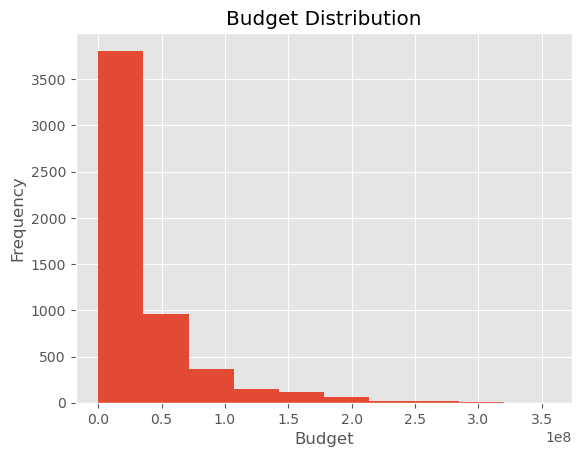

In [18]:
ax = df_movies["budget"].plot(kind="hist", title="Budget Distribution")

ax.set_xlabel("Budget")

plt.show()

##### Podemos ver que hay una distribución asimétrica positiva, lo que indicaría una presencia considerable de valores anómalos que aumentarán la media por encima de la mediana. 

In [19]:
df_movies["budget"].describe().round(2)

count         5,497.00
mean     35,589,876.19
std      41,457,296.60
min           3,000.00
25%      10,000,000.00
50%      20,500,000.00
75%      45,000,000.00
max     356,000,000.00
Name: budget, dtype: float64

##### Como preveíamos, la media (35,589,876) es ampliamente superior a la mediana (20,500,000). Utilizaremos esta última para llenar los valores nulos de este campo.

In [20]:
df_movies["budget"] = df_movies["budget"].fillna(df_movies["budget"].median())

##### Sigamos con el resto de columnas.

In [21]:
(df_movies.isna().sum() / df_movies.shape[0] * 100).sort_values(ascending=False).round(2)

gross        2.46
rating       1.00
company      0.22
runtime(m)   0.05
score        0.04
votes        0.04
writer       0.04
country      0.04
star         0.01
name         0.00
genre        0.00
year         0.00
director     0.00
budget       0.00
dtype: float64

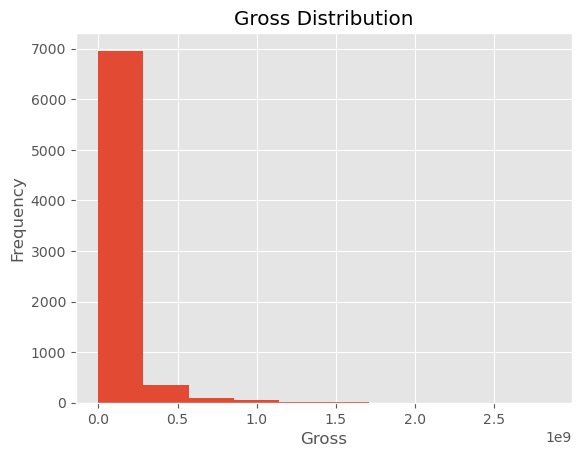

In [22]:

ax = df_movies["gross"].plot(kind="hist", title="Gross Distribution")

ax.set_xlabel("Gross")

plt.show()

##### Nuevamente, la distribución parece ser asimétrica positiva, así que investiguemos sus estadísticas.

In [23]:
df_movies["gross"].describe()

count           7,479.00
mean       78,500,541.02
std       165,725,124.32
min               309.00
25%         4,532,055.50
50%        20,205,757.00
75%        76,016,691.50
max     2,847,246,203.00
Name: gross, dtype: float64

##### En este campo, la diferencia entre la media y la mediana es incluso mayor que en "budget", por lo que también utilizaremos la mediana para completar los valores nulos.

In [24]:
df_movies["gross"] = df_movies["gross"].fillna(df_movies["gross"].median())

In [25]:
(df_movies.isna().sum() / df_movies.shape[0] * 100).sort_values(ascending=False).round(2)

rating       1.00
company      0.22
runtime(m)   0.05
score        0.04
votes        0.04
writer       0.04
country      0.04
star         0.01
name         0.00
genre        0.00
year         0.00
director     0.00
budget       0.00
gross        0.00
dtype: float64

##### Como el porcentaje nulo del resto de columnas no es representativo del total, eliminaremos los registros restantes.

In [26]:
# Eliminamos los valores nulos restantes

df_movies = df_movies.dropna()

# Verificamos que no haya más valores nulos en nuestro dataframe
df_movies.isna().sum()

name          0
rating        0
genre         0
year          0
score         0
votes         0
director      0
writer        0
star          0
country       0
budget        0
gross         0
company       0
runtime(m)    0
dtype: int64

# Preguntas a resolver

### **¿Qué géneros tienen la mayor cantidad de películas? ¿Qué porcentaje del total representan?**

##### Para responder a esta pregunta, vamos a obtener los 5 géneros con más películas y asignaremos los registros restantes a una categoría que llamaremos "Other"

In [28]:
# Creamos un dataframe con el count de cada genre
count_genre = df_movies["genre"].value_counts().reset_index()

# Sumamos el count de todos los géneros a partir de la sexta posición
sum_other = count_genre["count"].iloc[5:].sum()

# Asignamos la suma a un nuevo dataframe que llamaremos "other_row"
other_row = pd.DataFrame({"genre": ["Other"], "count": [sum_other]})

# Por último, concatenamos los 5 primeros géneros con el registro "Other"
count_genre = pd.concat([count_genre.iloc[:5], other_row], ignore_index=True)

##### A continuación, visualizamos los géneros con más películas:

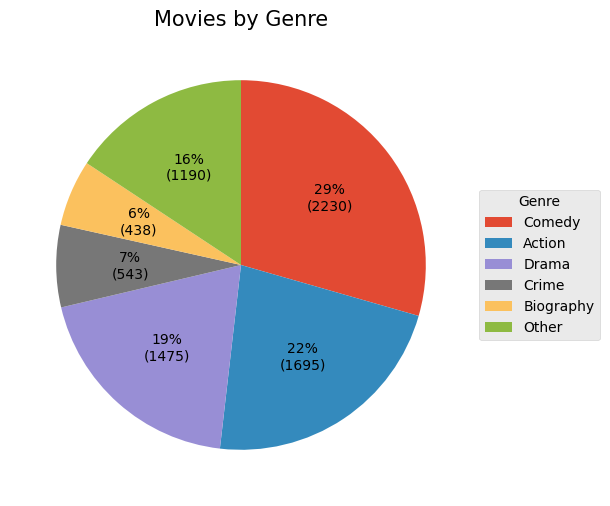

In [29]:
fig, ax = plt.subplots(figsize=(10,6))

# Esta función nos ayudará a visualizar el porcentaje del total con el número absoluto debajo
def absolute_value(val):
    total = sum(count_genre["count"])
    absolute = int(val/100 * total)
    return f"{val:.0f}%\n({absolute:d})"

plt.pie(count_genre["count"],
        autopct = absolute_value,
        startangle = -270,
        counterclock = False)

ax.legend(count_genre["genre"],
          title="Genre",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Movies by Genre", size=15);

### **¿Cuáles son los géneros con mayor promedio de presupuesto y recaudación?**

##### Definimos una variable agrupando por género y calculamos el promedio de presupuesto, promedio de recaudación y cantidad de películas.

In [30]:
gross_budget_by_genre = df_movies.groupby("genre").agg(
                                                        meanBudget=("budget", "mean"),
                                                        meanGross=("gross", "mean"),
                                                        movieCount=("name", "count")
                                                        ) \
                                                        .sort_values(by="meanGross", ascending=False)

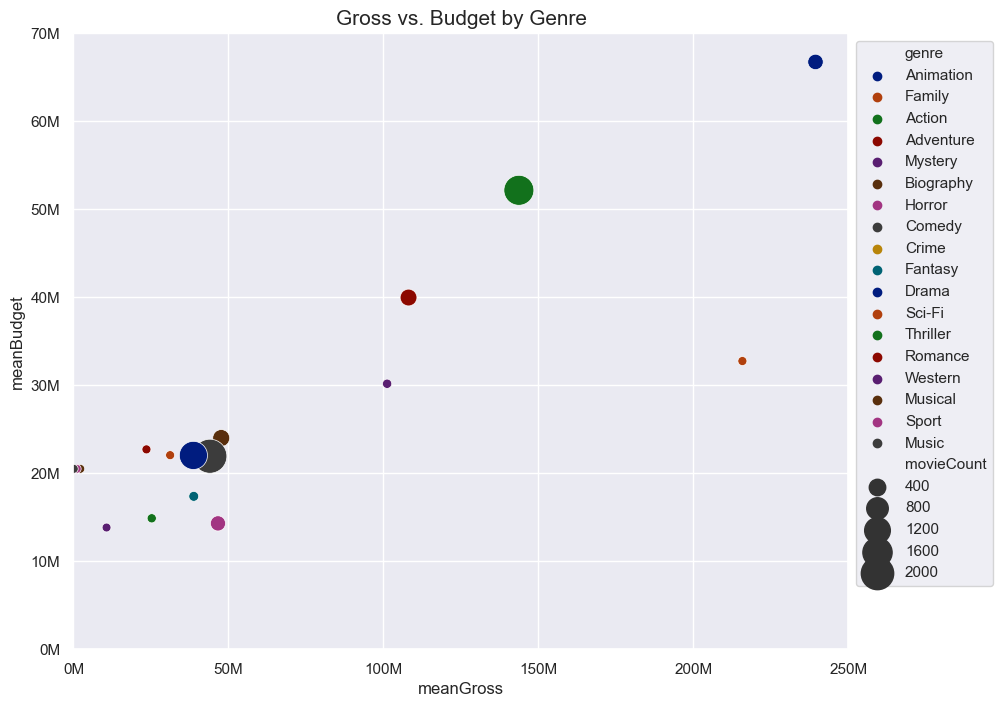

In [31]:
# Creamos una visualización con el dataframe creado
import matplotlib.ticker as ticker

sns.set_theme(rc={'figure.figsize':(10,8)})

g = sns.scatterplot(data=gross_budget_by_genre,
                    x="meanGross",
                    y="meanBudget",
                    hue="genre",
                    size="movieCount",
                    sizes=(40,600),
                    palette="dark")

g.set(xlim = (0,250000000),
      ylim = (0, 70000000))
g.set_title("Gross vs. Budget by Genre", size=15)

x_ticks = g.get_xticks()
y_ticks = g.get_yticks()

xlabels = ['{:,.0f}'.format(x / 1000000) + 'M' for x in x_ticks]
ylabels = ['{:,.0f}'.format(y / 1000000) + 'M' for y in y_ticks]

g.xaxis.set_major_locator(ticker.FixedLocator(x_ticks))
g.xaxis.set_major_formatter(ticker.FixedFormatter(xlabels))

g.yaxis.set_major_locator(ticker.FixedLocator(y_ticks))
g.yaxis.set_major_formatter(ticker.FixedFormatter(ylabels))

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1));

##### En esta visualización tenemos en el eje 'x' la recaudación media, en el eje 'y' el presupuesto medio, y el tamaño de la burbuja representa la cantidad de películas dentro de ese género.

##### En primer lugar, notamos que el género Animación es el que tiene mayor presupuesto medio (casi 70 millones) y recaudación media (alrededor de 240 millones). 

##### En segunda medida, podemos apreciar un patrón interesante en el género "Acción": es el segundo género con mayor cantidad de películas, el segundo con mayor presupuesto medio (por encima de los 50 millones) y el tercero con mayor recaudación media (casi 150 millones).

##### También es interesante mencionar que el género "Familia" consigue una recaudación media de casi 200 millones, a pesar de contar con un presupuesto inferior a "Acción" y "Aventura". Sin embargo, cabe destacar que la cantidad de películas de género "Familia" es ínfima (11), mientras que "Acción" tiene casi 1700 y "Aventura" más de 400.

##### Por último, resulta relevante apuntar que la categoría "Terror", con el segundo presupuesto medio más bajo, ostenta una recaudación media de casi 50 millones.

#### ------------------------------------------------------------------------

### **¿Cuáles son las 10 películas con mayor recaudación neta?**

##### Primero vamos a crear una nueva columna que calcule la ganancia neta de una película.

In [32]:
df_movies["netRevenue"] = df_movies["gross"] - df_movies["budget"]

df_movies.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime(m),netRevenue
0,The Shining,R,Drama,1980,8.40,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000.00","46,998,772.00",Warner Bros.,146,"27,998,772.00"
1,The Blue Lagoon,R,Adventure,1980,5.80,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000.00","58,853,106.00",Columbia Pictures,104,"54,353,106.00"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.70,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000.00","538,375,067.00",Lucasfilm,124,"520,375,067.00"
3,Airplane!,PG,Comedy,1980,7.70,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000.00","83,453,539.00",Paramount Pictures,88,"79,953,539.00"
4,Caddyshack,R,Comedy,1980,7.30,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000.00","39,846,344.00",Orion Pictures,98,"33,846,344.00"


##### Y luego creamos la visualización con las 10 películas que más ganancias generaron.

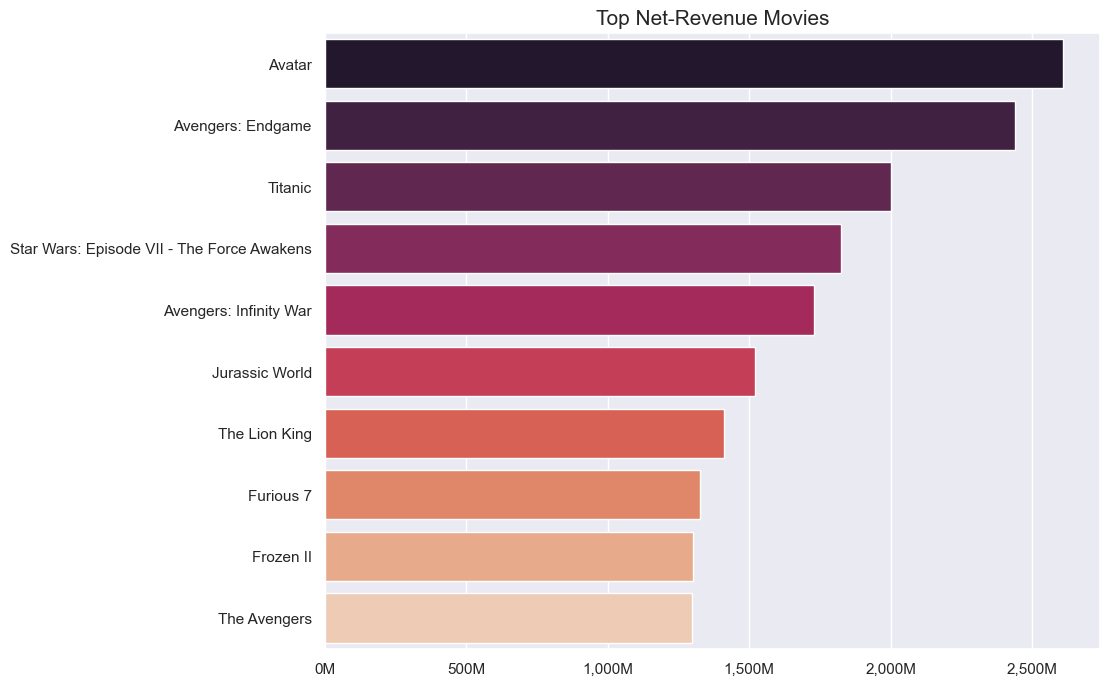

In [33]:
g = sns.barplot(data = df_movies\
                            .sort_values(by="netRevenue", 
                                         ascending=False)\
                            .head(10),
                x = "netRevenue",
                y = "name",
                palette = "rocket")

g.set(xlabel=None, ylabel=None)
g.set_title("Top Net-Revenue Movies", fontsize=15)

x_ticks = g.get_xticks()
xlabels = ['{:,.0f}'.format(x / 1000000) + 'M' for x in x_ticks]

g.xaxis.set_major_locator(ticker.FixedLocator(x_ticks))
g.xaxis.set_major_formatter(ticker.FixedFormatter(xlabels));

### **¿Cuáles son las 10 películas mejor valoradas?**

##### Para tener en cuenta la valoración de una película, primero debemos establecer un umbral de votos. No consideraremos la valoración de películas cuya cantidad de votos esté por debajo de este umbral.

In [34]:
df_movies["votes"].describe()

count       7,574.00
mean       88,940.74
std       164,041.88
min            35.00
25%         9,400.00
50%        33,000.00
75%        94,000.00
max     2,400,000.00
Name: votes, dtype: Float64

##### Estableceremos la mediana como umbral: las películas deben superar los 33000 votos para ser consideradas en la valoración final.

In [35]:
# Filtramos el dataframe para solo incluir los registros con una cantidad de votos superior a la mediana
qualified_movies = df_movies[df_movies["votes"] > df_movies["votes"].median()]

# Nos quedamos solo con los 10 mejores puntuados; si dos películas tienen el mismo puntaje, la que tenga más votos aparecerá primera
top_10_score = qualified_movies.sort_values(by=["score", "votes"], ascending=False).head(10)

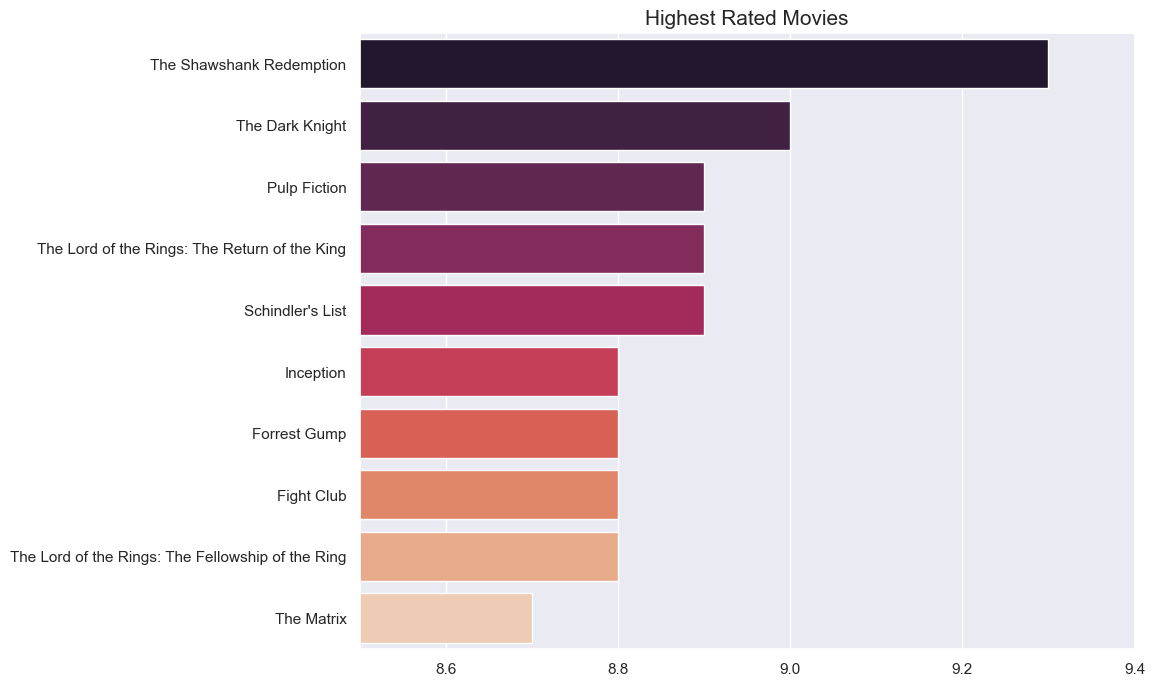

In [36]:
g = sns.barplot(data = top_10_score,
                x = "score",
                y = "name",
                palette="rocket")

g.set(xlim=(8.5,9.4))
g.set(xlabel=None, ylabel=None)
g.set_title("Highest Rated Movies", fontsize=15);

### **¿Un mayor presupuesto asegura una mayor recaudación?**

##### En primer lugar, observemos la correlación de las variables numéricas

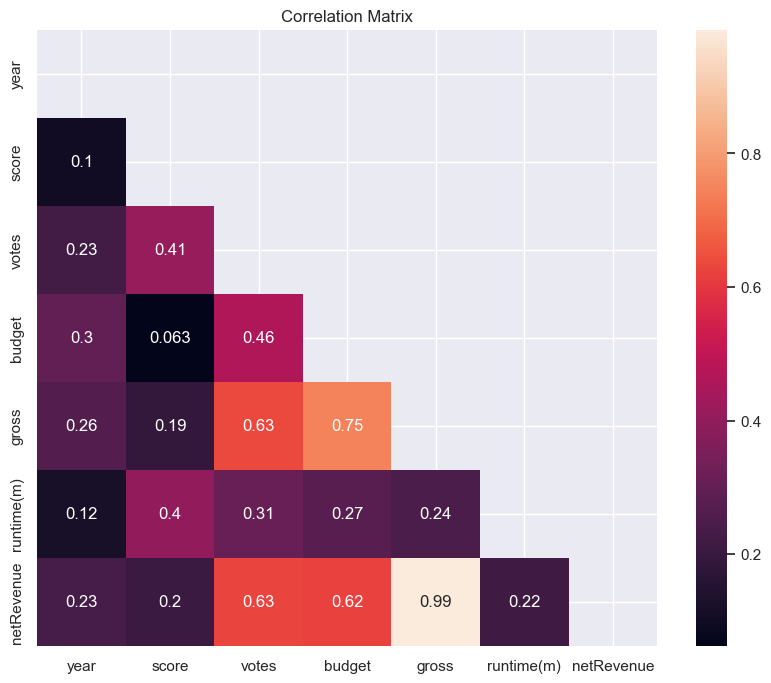

In [37]:
numeric_df = df_movies.select_dtypes(include=[float, int])

g = sns.heatmap(numeric_df.corr(), annot=True, mask=np.triu(np.ones_like(numeric_df.corr(), dtype=bool)))

g.set_title("Correlation Matrix");

##### El presupuesto y la recaudación de una película tienen una correlación positiva de 0.75. A continuación lo graficamos para visualizarla.

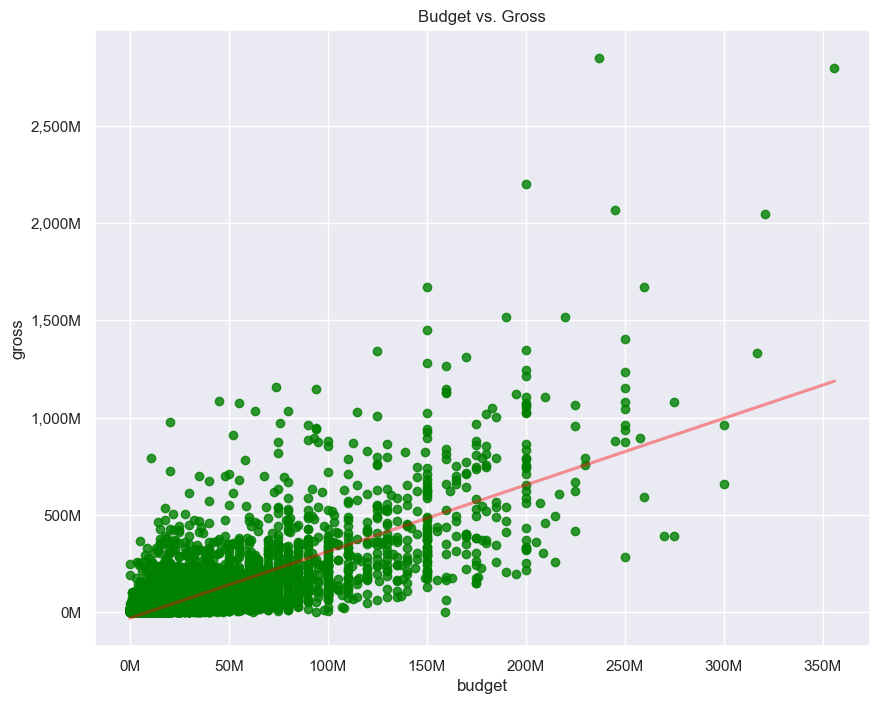

In [38]:
g = sns.regplot(data=df_movies,
                x = "budget",
                y = "gross",
                color = "green",
                line_kws={"color": "red", "alpha": 0.4},
                ci=None)

x_ticks = g.get_xticks()
y_ticks = g.get_yticks()

xlabels = ['{:,.0f}'.format(x / 1000000) + 'M' for x in x_ticks]
ylabels = ['{:,.0f}'.format(y / 1000000) + 'M' for y in y_ticks]

g.xaxis.set_major_locator(ticker.FixedLocator(x_ticks))
g.xaxis.set_major_formatter(ticker.FixedFormatter(xlabels))

g.yaxis.set_major_locator(ticker.FixedLocator(y_ticks))
g.yaxis.set_major_formatter(ticker.FixedFormatter(ylabels))

g.set_title("Budget vs. Gross");

### **Una película con mucha recaudación, ¿tiene siempre una buena valoración?**

##### En la matriz de correlación vimos que estas variables tienen un 0.19, es decir, una correlación débil.

##### Analicemos las estadísticas de la columna "gross"

In [39]:
df_movies["gross"].describe()

count           7,574.00
mean       77,736,142.61
std       164,648,795.81
min               309.00
25%         4,843,455.25
50%        20,205,757.00
75%        74,028,959.00
max     2,847,246,203.00
Name: gross, dtype: float64

##### El 75% de las películas generaron una recaudación inferior a los 73 millones. Veamos si hay películas con una recaudación superior a este número y con malas valoraciones (**por debajo de 5**).

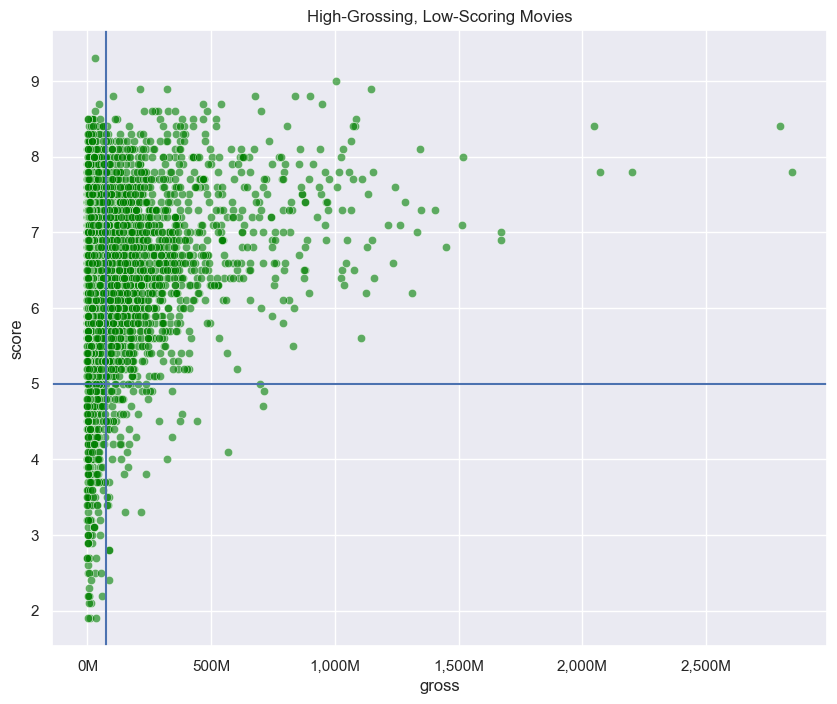

In [40]:
percentil_75 = df_movies["gross"].quantile(0.75)

g = sns.scatterplot(data=df_movies,
                x = "gross",
                y = "score",
                color = "green",
                alpha = 0.6)

# Añadimos una línea horizontal para marcar el límite de una mala valoración (5)
plt.axhline(y = 5) 

# Y una línea vertical que coincida con la variable percentil_75
plt.axvline(x = percentil_75) 

x_ticks = g.get_xticks()
xlabels = ['{:,.0f}'.format(x / 1000000) + 'M' for x in x_ticks]
g.xaxis.set_major_locator(ticker.FixedLocator(x_ticks))
g.xaxis.set_major_formatter(ticker.FixedFormatter(xlabels))

g.set_title("High-Grossing, Low-Scoring Movies");

##### El gráfico nos muestra algunos casos donde la recaudación supera el percentil 75 de recaudación pero la valoración no llega a los 5 puntos. Veamos cuántas películas son:

In [41]:
low_score_high_grossing_movies = df_movies[(df_movies["score"] < 5) & (df_movies["gross"] > percentil_75)]

len(low_score_high_grossing_movies)

68

##### Y qué porcentaje representan respecto del total de películas con una recaudación superior al percentil 75:

In [42]:
above_75_count = df_movies["gross"][df_movies["gross"] > percentil_75].count()

above_75_low_score_count = len(low_score_high_grossing_movies)

above_75_low_score_rate = ((above_75_low_score_count / above_75_count) * 100).round(2)

print(f'{above_75_low_score_rate}%')

3.59%


##### Solo un 3,59 % de las películas con una recaudación superior al percentil 75 tienen una valoración inferior a los 5 puntos.

##### Veamos el detalle de las 10 con peor puntaje:

In [43]:
low_score_high_grossing_movies\
                            .sort_values(by=["score", "gross"],
                                        ascending=[True, False])\
                            .reset_index(drop=True)\
                            .head(10)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime(m),netRevenue
0,Epic Movie,PG-13,Adventure,2007,2.40,103000,Jason Friedberg,Jason Friedberg,Kal Penn,United States,"20,000,000.00","87,238,158.00",New Regency Productions,86,"67,238,158.00"
1,Meet the Spartans,PG-13,Comedy,2008,2.80,103000,Jason Friedberg,Jason Friedberg,Sean Maguire,United States,"30,000,000.00","85,897,593.00",New Regency Productions,87,"55,897,593.00"
2,Date Movie,PG-13,Comedy,2006,2.80,58000,Aaron Seltzer,Jason Friedberg,Alyson Hannigan,United States,"20,000,000.00","85,749,034.00",New Regency Productions,83,"65,749,034.00"
3,The Emoji Movie,PG,Animation,2017,3.30,58000,Tony Leondis,Tony Leondis,T.J. Miller,United States,"50,000,000.00","217,776,646.00",Columbia Pictures,86,"167,776,646.00"
4,Jack and Jill,PG,Comedy,2011,3.30,80000,Dennis Dugan,Ben Zook,Adam Sandler,United States,"79,000,000.00","149,673,788.00",Columbia Pictures,91,"70,673,788.00"
5,Catwoman,PG-13,Action,2004,3.40,113000,Pitof,Bob Kane,Halle Berry,United States,"100,000,000.00","82,102,379.00",Warner Bros.,104,"-17,897,621.00"
6,Vampires Suck,PG-13,Comedy,2010,3.40,47000,Jason Friedberg,Jason Friedberg,Jenn Proske,United States,"20,000,000.00","80,547,866.00",New Regency Productions,82,"60,547,866.00"
7,Spy Kids 4-D: All the Time in the World,PG,Animation,2011,3.50,24000,Robert Rodriguez,Robert Rodriguez,Jessica Alba,United States,"27,000,000.00","85,564,310.00",Dimension Films,89,"58,564,310.00"
8,Scary Movie V,PG-13,Comedy,2013,3.50,67000,Malcolm D. Lee,David Zucker,Simon Rex,United States,"20,000,000.00","78,378,744.00",Dimension Films,86,"58,378,744.00"
9,Jaws 3-D,PG,Adventure,1983,3.70,41000,Joe Alves,Peter Benchley,Dennis Quaid,United States,"20,500,000.00","87,987,055.00",Universal Pictures,99,"67,487,055.00"


##### Y de las 10 con mayor recaudación:

In [44]:
low_score_high_grossing_movies\
                            .sort_values(by=["gross"], ascending=False)\
                            .reset_index(drop=True)\
                            .head(10)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime(m),netRevenue
0,The Twilight Saga: Breaking Dawn - Part 1,PG-13,Adventure,2011,4.90,228000,Bill Condon,Melissa Rosenberg,Kristen Stewart,United States,"110,000,000.00","712,205,856.00",Summit Entertainment,117,"602,205,856.00"
1,The Twilight Saga: New Moon,PG-13,Adventure,2009,4.70,271000,Chris Weitz,Melissa Rosenberg,Kristen Stewart,United States,"50,000,000.00","711,025,481.00",Temple Hill Entertainment,130,"661,025,481.00"
2,Fifty Shades of Grey,R,Drama,2015,4.10,304000,Sam Taylor-Johnson,Kelly Marcel,Dakota Johnson,United States,"40,000,000.00","569,651,467.00",Focus Features,125,"529,651,467.00"
3,Alvin and the Chipmunks: the Squeakquel,PG,Animation,2009,4.50,45000,Betty Thomas,Jon Vitti,Jason Lee,United States,"75,000,000.00","443,140,005.00",Fox 2000 Pictures,88,"368,140,005.00"
4,Fifty Shades Darker,R,Drama,2017,4.60,95000,James Foley,Niall Leonard,Dakota Johnson,United States,"55,000,000.00","381,545,846.00",Universal Pictures,118,"326,545,846.00"
5,Fifty Shades Freed,R,Drama,2018,4.50,59000,James Foley,Niall Leonard,Dakota Johnson,United States,"55,000,000.00","371,987,838.00",Perfect World Pictures,105,"316,987,838.00"
6,Alvin and the Chipmunks: Chipwrecked,G,Animation,2011,4.30,33000,Mike Mitchell,Jonathan Aibel,Justin Long,United States,"75,000,000.00","342,695,435.00",Fox 2000 Pictures,87,"267,695,435.00"
7,The Flintstones,PG,Comedy,1994,4.90,77000,Brian Levant,Tom S. Parker,John Goodman,United States,"46,000,000.00","341,631,208.00",Universal Pictures,91,"295,631,208.00"
8,The Last Airbender,PG,Action,2010,4.00,156000,M. Night Shyamalan,M. Night Shyamalan,Noah Ringer,United States,"150,000,000.00","319,713,881.00",Paramount Pictures,103,"169,713,881.00"
9,Sex and the City 2,R,Comedy,2010,4.50,76000,Michael Patrick King,Michael Patrick King,Sarah Jessica Parker,United States,"100,000,000.00","290,745,055.00",New Line Cinema,146,"190,745,055.00"


### **¿Qué directores y actores trabajaron más veces juntos?**

##### Para poder responder esta pregunta, primero vamos a contar la cantidad de películas agrupando por director y actor:

In [45]:
actor_and_director = df_movies.groupby(["director", "star"])\
                                .agg(movieCount=("name", "count"))\
                                .sort_values(by="movieCount", ascending=False)\
                                .reset_index()

##### Luego eliminamos los registros donde el director y el actor de la película sea el mismo (Clint Eastwood, Woody Allen, etc.):

In [46]:
actor_and_director = actor_and_director[actor_and_director["director"] != actor_and_director["star"]]

##### Por último, mostramos solo los resultados de aquellos que hayan compartido 4 o más películas:

In [47]:
actor_and_director = actor_and_director[actor_and_director["movieCount"] >= 4].reset_index(drop=True)

##### A continuación, creamos una tabla que nos muestre la cantidad de películas para cada combinación de actor y director en nuestro dataset:

In [48]:
collaboration_matrix = pd.crosstab(actor_and_director['director'], 
                                   actor_and_director['star'], 
                                   values = actor_and_director['movieCount'], 
                                   aggfunc='sum')

##### Y por último, visualizamos esta tabla:

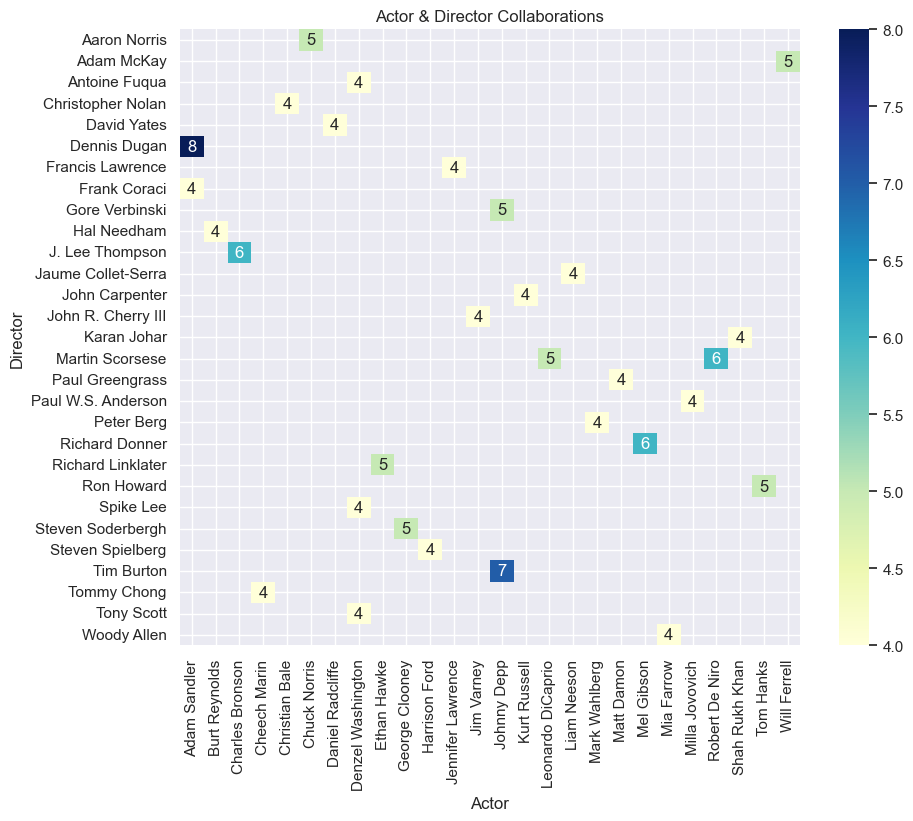

In [49]:
g = sns.heatmap(collaboration_matrix, annot=True, cmap="YlGnBu")

g.set(xlabel="Actor", ylabel="Director")

g.set_title("Actor & Director Collaborations");

##### Dennis Dugan y Adam Sandler son los que han colaborado en más ocasiones, con 8 películas.
##### Por su parte, Tim Burton y Johnny Depp realizaron 7 colaboraciones.
##### J. Lee Thompson con Charles Bronson, Richard Donner con Mel Gibson, y Martin Scorsese con Robert De Niro han colaborado en 6 películas.

### **¿Ha variado el presupuesto y la recaudación a través de los años?**

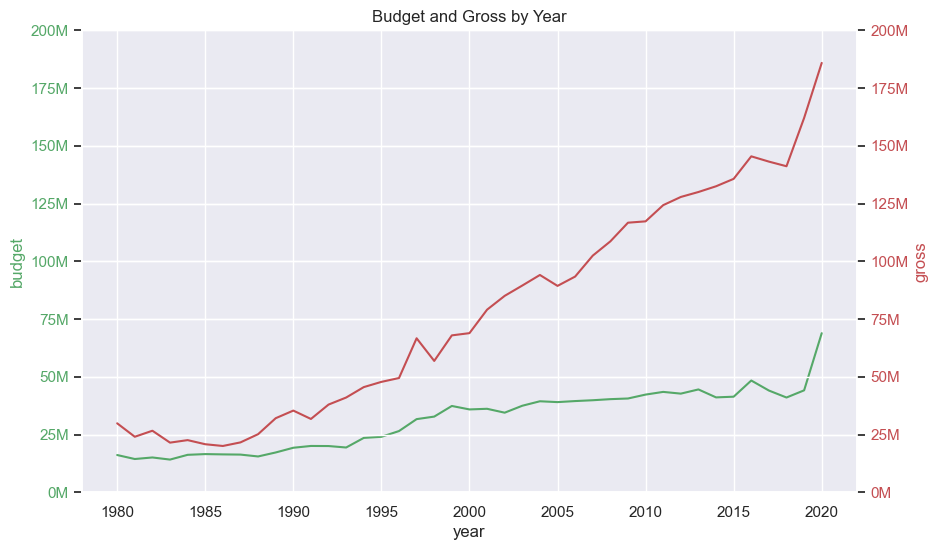

In [50]:
# Importmos FuncFormatter para personalizar las etiquetas del eje
from matplotlib.ticker import FuncFormatter

# Con esta función damos formato a los valores
def millions(x, pos):
    return '%1.0fM' % (x * 1e-6)

# Creamos la figura
fig, ax1 = plt.subplots(figsize=(10,6))

# Creamos un gráfico de líneas del presupuesto por año
sns.lineplot(x=df_movies["year"], 
             y=df_movies["budget"], 
             color="g", 
             errorbar=None)

# Creamos un eje Y secundario
ax2 = ax1.twinx()

# Añadimos una segunda línea a nuestro gráfico con la recaudación por año
sns.lineplot(x = df_movies["year"], 
             y= df_movies["gross"], 
             ax=ax2, 
             color="r", 
             errorbar=None)

# Personalizamos los ejes y ticks para que coincidan con el color de la línea
ax1.set_ylabel('budget', color='g')
ax2.set_ylabel('gross', color='r')
ax1.tick_params(axis='y', labelcolor='g')
ax2.tick_params(axis='y', labelcolor='r')

# Personalizamos el formato de los números utilizando la función "millions" creada anteriormente
ax1.yaxis.set_major_formatter(FuncFormatter(millions))
ax2.yaxis.set_major_formatter(FuncFormatter(millions))

# Sincronizamos los límites de ambos ejes Y
ax1.set_ylim(0, 200000000)
ax2.set_ylim(0, 200000000)

plt.title("Budget and Gross by Year");

##### Entre los años 1980 y 2000, el presupuesto y la recaudación parecían fluctuar de manera similar. Es a partir del 2000 que la recaudación empieza a incrementarse de manera muy pronunciada, mientras que el presupuesto medio se mantiene en una tendencia positiva mucho más leve.

##### Analicemos cuánto incrementó del año 2000 al año 2020 la diferencia entre la recaudación y el presupuesto:

In [51]:
year_grouped = df_movies.groupby("year")[["budget", "gross"]].mean()

year_grouped = year_grouped.query('year >= 2000').reset_index()

year_grouped["margin"] = (year_grouped["gross"] - year_grouped["budget"]) / year_grouped["budget"] * 100

year_grouped

,year,budget,gross,margin
0,2000,"35,853,316.33","68,874,339.49",92.10
1,2001,"36,128,934.01","79,033,122.74",118.75
2,2002,"34,445,644.83","85,017,182.60",146.82
3,2003,"37,448,883.25","89,484,636.06",138.95
4,2004,"39,386,065.33","94,060,219.06",138.82
5,2005,"39,022,470.00","89,333,049.48",128.93
6,2006,"39,473,500.00","93,371,380.60",136.54
7,2007,"39,831,708.54","102,427,354.48",157.15
8,2008,"40,303,650.00","108,611,838.83",169.48
9,2009,"40,585,000.00","116,693,403.05",187.53


##### Lo graficamos para visualizarlo mejor:

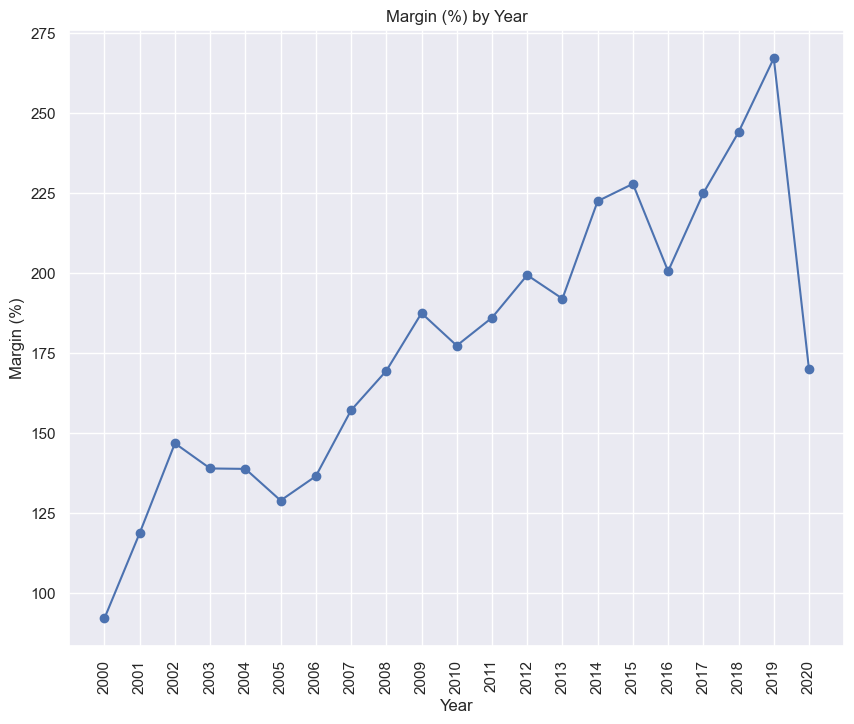

In [52]:
plt.plot(year_grouped["year"], 
         year_grouped["margin"], 
         marker='o')

plt.xlabel("Year")
plt.ylabel("Margin (%)")
plt.title("Margin (%) by Year")
plt.xticks(year_grouped["year"], rotation=90);

##### Partiendo de un 92% de margen en el 2000 (casi el doble de recaudación que de presupuesto), la tendencia fue en ascenso y alcanzó su pico máximo en el 2019, donde llegó a un 267%, es decir, la recaudación media representó entre el triple y el cuádruple del presupuesto medio ese año. 

##### Si bien la recaudación de 2020 fue la más alta de la historia, también lo fue el presupuesto utilizado, por lo que el margen sufrió una caída considerable respecto de los años anteriores.